<a href="https://colab.research.google.com/github/AmalpriyaSivan/Brain-tumor-classification/blob/main/Projectbrain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import PIL
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import h5py
import cv2
from google.colab.patches import cv2_imshow
%matplotlib inline

In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/dataset/1512427 (1).zip') as zf:
  zip_dir = zf.namelist()[0]
  zf.extractall('/content/drive/My Drive/Colab Notebooks/newdataset')

In [ ]:

!ls '/content/drive/My Drive/Colab Notebooks/newdataset/'

brainTumorDataPublic_1533-2298.zip  cvind.mat
brainTumorDataPublic_1-766.zip	    imageData
brainTumorDataPublic_2299-3064.zip  README.txt
brainTumorDataPublic_767-1532.zip   Training


In [ ]:

with zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/newdataset/brainTumorDataPublic_1-766.zip') as zf:
  os.mkdir('/content/drive/My Drive/Colab Notebooks/newdataset/bt_set1')
  zip_dir = zf.namelist()[0]
  zf.extractall('/content/drive/My Drive/Colab Notebooks/newdataset/bt_set1')

In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/newdataset/brainTumorDataPublic_1533-2298.zip') as zf:
  os.mkdir('/content/drive/My Drive/Colab Notebooks/newdataset/bt_set2')
  zip_dir = zf.namelist()[0]
  zf.extractall('/content/drive/My Drive/Colab Notebooks/newdataset/bt_set2')

In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/newdataset/brainTumorDataPublic_2299-3064.zip') as zf:
  os.mkdir('/content/drive/My Drive/Colab Notebooks/newdataset/bt_set3')
  zip_dir = zf.namelist()[0]
  zf.extractall('/content/drive/My Drive/Colab Notebooks/newdataset/bt_set3')

In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/newdataset/brainTumorDataPublic_767-1532.zip') as zf:
  os.mkdir('/content/drive/My Drive/Colab Notebooks/newdataset/bt_set4')
  zip_dir = zf.namelist()[0]
  zf.extractall('/content/drive/My Drive/Colab Notebooks/newdataset/bt_set4')

In [ ]:
os.mkdir('/content/drive/My Drive/Colab Notebooks/newdataset/imageData')

FileExistsError: ignored

In [ ]:

!mv /content/drive/'My Drive'/'Colab Notebooks'/newdataset/bt_set1/*.mat '/content/drive/My Drive/Colab Notebooks/newdataset/imageData/'
!mv /content/drive/'My Drive'/'Colab Notebooks'/newdataset/bt_set2/*.mat '/content/drive/My Drive/Colab Notebooks/newdataset/imageData/'
!mv /content/drive/'My Drive'/'Colab Notebooks'/newdataset/bt_set3/*.mat '/content/drive/My Drive/Colab Notebooks/newdataset/imageData/'
!mv /content/drive/'My Drive'/'Colab Notebooks'/newdataset/bt_set4/*.mat '/content/drive/My Drive/Colab Notebooks/newdataset/imageData/'


In [ ]:

#Converting all the data into Python list
from progressbar import ProgressBar
pbar = ProgressBar()

directory="/content/drive/MyDrive/Colab Notebooks/newdataset/imageData"
N=3064
data_list=[]

for i in pbar(range(1,N+1)):
    filepath=str(i)+".mat"
    data=h5py.File(os.path.join(directory,filepath),"r")
    data_list.append(data)


100% (3064 of 3064) |####################| Elapsed Time: 0:14:26 Time:  0:14:26


In [ ]:
len(data_list)

3064

In [ ]:
from tqdm import tqdm

features_list = []
labels_list = []
tumor_border_list = []
tumor_mask_list = []
pid_list = []

for i in tqdm(range(len(data_list))):
    image = data_list[i]["cjdata"]["image"][()]

    if image.shape == (512, 512):
        image = np.expand_dims(image, axis=0)
        features_list.append(image)

        label = int(data_list[i]["cjdata"]["label"][()][0]) - 1
        labels_list.append(label)

        tumor_border = data_list[i]["cjdata"]["tumorBorder"][0]
        tumor_border_list.append(tumor_border)

        tumor_mask = data_list[i]["cjdata"]["tumorMask"][()]
        tumor_mask_list.append(tumor_mask)

        pid = data_list[i]["cjdata"]["PID"][0]
        pid_list.append(pid)

features = np.array(features_list)
labels = np.array(labels_list)
tumor_border = np.array(tumor_border_list)
tumor_mask = np.array(tumor_mask_list)
pid = np.array(pid_list)

print("We removed", len(data_list) - len(features),)


100%|██████████| 3064/3064 [00:25<00:00, 120.35it/s]
<ipython-input-6-5695bd3f76f0>:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tumor_border = np.array(tumor_border_list)


We removed 15


In [ ]:
import os
import numpy as np


folder_path = '/content/drive/MyDrive/Colab Notebooks/newdataset'

np.save(os.path.join('/content/drive/MyDrive/Colab Notebooks/newdataset', 'tumor_border.npy'),tumor_border)
np.save(os.path.join('/content/drive/MyDrive/Colab Notebooks/newdataset', 'tumor_mask.npy'),tumor_mask)
#np.save(os.path.join('/content/drive/MyDrive/Colab Notebooks/newdataset', 'labels.npy'),labels)
#np.save(os.path.join('/content/drive/MyDrive/Colab Notebooks/newdataset', 'features.npy'),features)

In [ ]:
import numpy as np

# Step 1: Load the two NumPy arrays from their files
labels1 = '/content/drive/MyDrive/Colab Notebooks/newdataset/labels.npy'
labels2 = '/content/drive/MyDrive/Colab Notebooks/newdataset/Training/labels.npy'

label1= np.load(labels1)
label2= np.load(labels2)

# Step 2: Concatenate the arrays along the desired axis (e.g., axis=0 for vertical concatenation)
concatenated_array1 = np.concatenate((label1, label2), axis=0)

labels = concatenated_array1
np.save(os.path.join('/content/drive/MyDrive/Colab Notebooks/newdataset', 'labels3.npy'),labels)


In [ ]:
labels.shape


(5919,)

In [ ]:
import numpy as np

features1 = '/content/drive/MyDrive/Colab Notebooks/newdataset/Training/data.npy'
features2 = '/content/drive/MyDrive/Colab Notebooks/newdataset/features.npy'

feature1= np.load(features1)
feature2= np.load(features2)
feature1= np.resize(feature1,(2870,1,512,512))

# Step 2: Concatenate the arrays along the desired axis (e.g., axis=0 for vertical concatenation)
concatenated_array = np.vstack((feature1, feature2))

features = concatenated_array
np.save(os.path.join('/content/drive/MyDrive/Colab Notebooks/newdataset', 'features3.npy'),features)


Number of meningioma: 1530
Number of glioma: 2252
Number of pituitary tumor: 1742
Number of no_tumor: 395


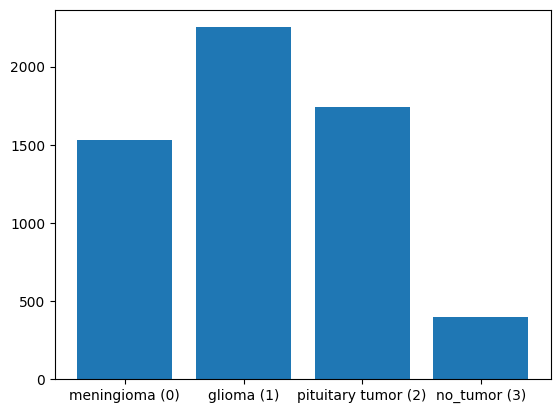

In [ ]:

integer_to_class = {
    '0': 'meningioma',
    '1': 'glioma',
    '2': 'pituitary tumor',
    '3': 'no_tumor'
}
classes, counts = np.unique(labels, return_counts=True)

plt.bar(classes, counts,
        tick_label=['meningioma (0)', 'glioma (1)', 'pituitary tumor (2)', 'no_tumor (3)'])

for i, idx in enumerate(classes):
    print('Number of {}: {}'.format(integer_to_class[str(idx)], counts[i]))


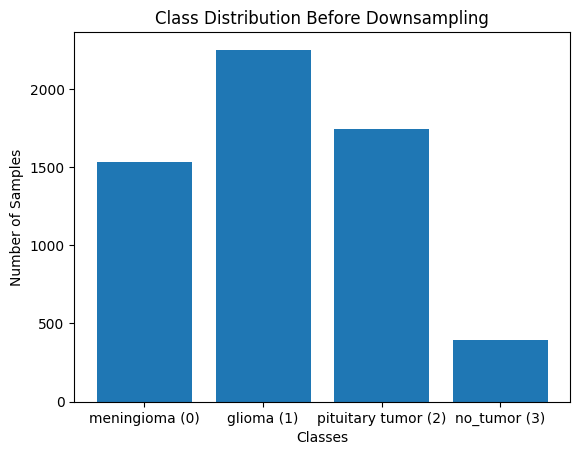

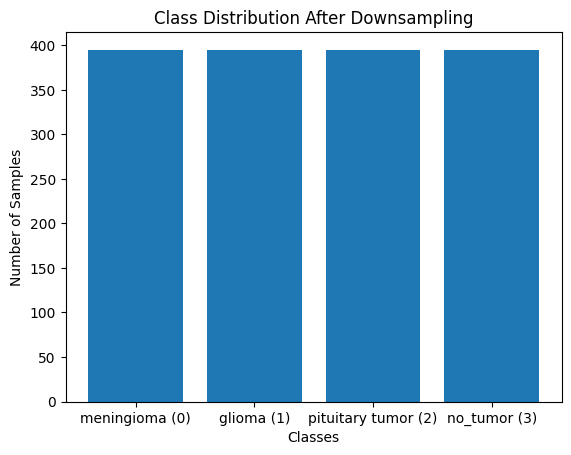

Number of meningioma: 395
Number of glioma: 395
Number of pituitary tumor: 395
Number of no_tumor: 395


In [ ]:
import numpy as np
from sklearn.utils import resample
import matplotlib.pyplot as plt


classes, counts = np.unique(labels, return_counts=True)

plt.bar(classes, counts, tick_label=['meningioma (0)', 'glioma (1)', 'pituitary tumor (2)', 'no_tumor (3)'])
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Class Distribution Before Downsampling')
plt.show()
minority_class_size = min(counts)
downsampled_indices = []
for idx in classes:
    class_indices = np.where(labels == idx)[0]
    if idx == 3:
        downsampled_indices.extend(resample(class_indices, replace=True, n_samples=minority_class_size, random_state=42))
    else:
        downsampled_indices.extend(resample(class_indices, replace=False, n_samples=minority_class_size, random_state=42))

features_downsampled = features[downsampled_indices]
labels_downsampled = labels[downsampled_indices]


classes_downsampled, counts_downsampled = np.unique(labels_downsampled, return_counts=True)
plt.bar(classes_downsampled, counts_downsampled, tick_label=['meningioma (0)', 'glioma (1)', 'pituitary tumor (2)', 'no_tumor (3)'])
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Class Distribution After Downsampling')
plt.show()

integer_to_class = {
    '0': 'meningioma',
    '1': 'glioma',
    '2': 'pituitary tumor',
    '3': 'no_tumor'
}

for i, idx in enumerate(classes_downsampled):
    print('Number of {}: {}'.format(integer_to_class[str(idx)], counts_downsampled[i]))


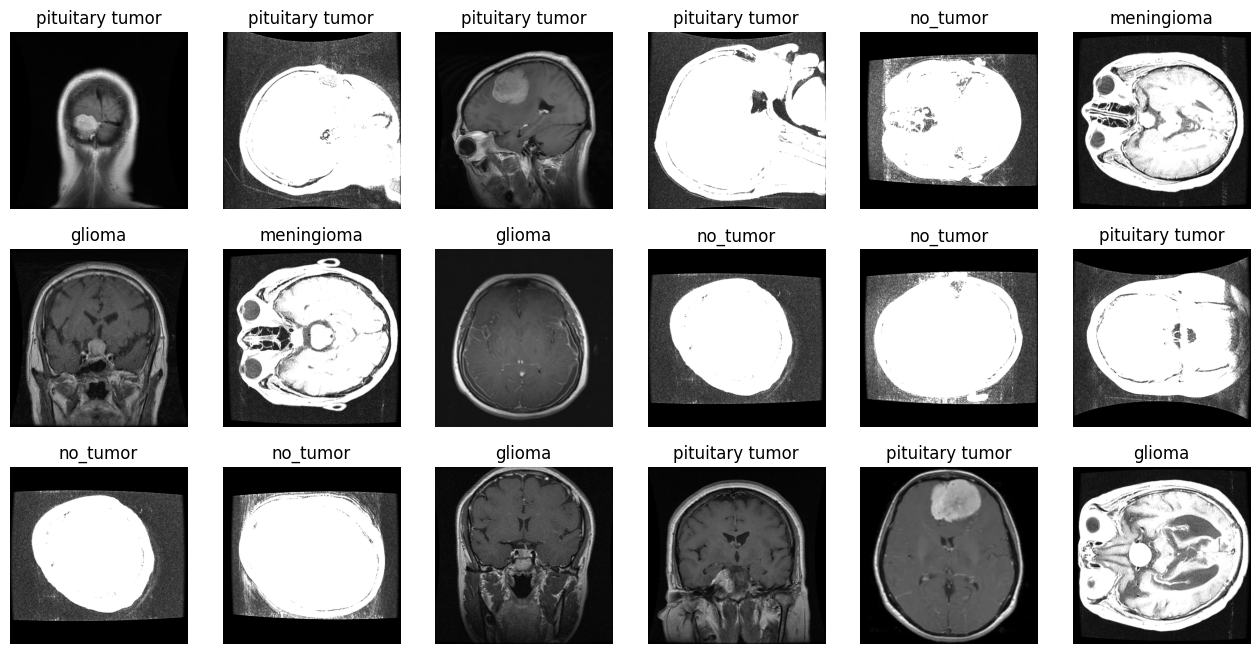

In [ ]:
plt.figure(figsize=(16, 8))
for i, idx in enumerate(np.random.randint(features_downsampled.shape[0], size=18), start=1):
    plt.subplot(3, 6, i)

    # Extract the 2D slice from the (1, 512, 512) array
    image_slice = features_downsampled[idx][0]
    plt.imshow(image_slice, cmap='gray')

    mask_slice = tumor_mask[idx][0]
    alpha_mask = np.zeros_like(image_slice)
    alpha_mask[mask_slice != 0] = 0.3
    alpha_mask = np.expand_dims(alpha_mask, axis=-1)
    overlayed_image = np.dstack((image_slice, image_slice, image_slice))
    overlayed_image += alpha_mask
    plt.imshow(overlayed_image, cmap='gray')

    plt.title(integer_to_class[str(labels_downsampled[idx])])
    plt.axis('off')

plt.show()


In [ ]:
pip install scikit-image

In [ ]:
from skimage.transform import resize

resized_features = np.zeros((features_downsampled.shape[0], 512, 512))
for i in range(features_downsampled.shape[0]):
    resized_features[i] = resize(features_downsampled[i, 0], (512, 512))



In [ ]:
from skimage.filters import threshold_otsu

tumor_masks = np.zeros_like(resized_features)


for i in range(resized_features.shape[0]):
    threshold_value = threshold_otsu(resized_features[i])

    tumor_masks[i] = resized_features[i] > threshold_value


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


overlayed_images = np.zeros((resized_features.shape[0], 512, 512, 3))


for i in range(resized_features.shape[0]):
    tumor_region = resized_features[i] * tumor_masks[i]
    overlayed_image = np.stack([resized_features[i]] * 3, axis=-1)
    overlayed_image[tumor_region != 0] = [255, 0, 0]
    overlayed_images[i] = overlayed_image

plt.figure(figsize=(16, 8))
for i, idx in enumerate(np.random.randint(resized_features.shape[0], size=18), start=1):
    plt.subplot(3, 6, i)

    image_slice = resized_features[idx]
    plt.imshow(image_slice, cmap='gray')
    mask = np.ma.masked_where(tumor_masks[idx] == False, tumor_masks[idx])
    plt.imshow(mask, alpha=0.3, cmap='Set1')
    plt.imshow(overlayed_images[idx], alpha=0.5)
    plt.title(integer_to_class[str(labels_downsampled[idx])])
    plt.axis('off')

plt.show()


In [ ]:
# Calculate the area of the tumor region in each overlayed image
tumor_areas = []

for i in range(resized_features.shape[0]):
    tumor_region = overlayed_images[i][:, :, 0] == 255
    tumor_area = np.sum(tumor_region)
    tumor_areas.append(tumor_area)

# Print the tumor areas
print("Tumor Areas:")
for i, area in enumerate(tumor_areas, start=1):
    print(f"Image {i}: {area} pixels")


Tumor Areas:
Image 1: 104423 pixels
Image 2: 115989 pixels
Image 3: 101773 pixels
Image 4: 138230 pixels
Image 5: 101895 pixels
Image 6: 171852 pixels
Image 7: 142581 pixels
Image 8: 151789 pixels
Image 9: 143483 pixels
Image 10: 128080 pixels
Image 11: 102447 pixels
Image 12: 162592 pixels
Image 13: 136308 pixels
Image 14: 136559 pixels
Image 15: 103519 pixels
Image 16: 163477 pixels
Image 17: 154150 pixels
Image 18: 131101 pixels
Image 19: 139565 pixels
Image 20: 109451 pixels
Image 21: 103460 pixels
Image 22: 115267 pixels
Image 23: 124018 pixels
Image 24: 129377 pixels
Image 25: 92147 pixels
Image 26: 140914 pixels
Image 27: 157101 pixels
Image 28: 77027 pixels
Image 29: 124018 pixels
Image 30: 129341 pixels
Image 31: 122958 pixels
Image 32: 145942 pixels
Image 33: 146817 pixels
Image 34: 96338 pixels
Image 35: 105277 pixels
Image 36: 142395 pixels
Image 37: 78367 pixels
Image 38: 145118 pixels
Image 39: 113195 pixels
Image 40: 88053 pixels
Image 41: 142399 pixels
Image 42: 144817 

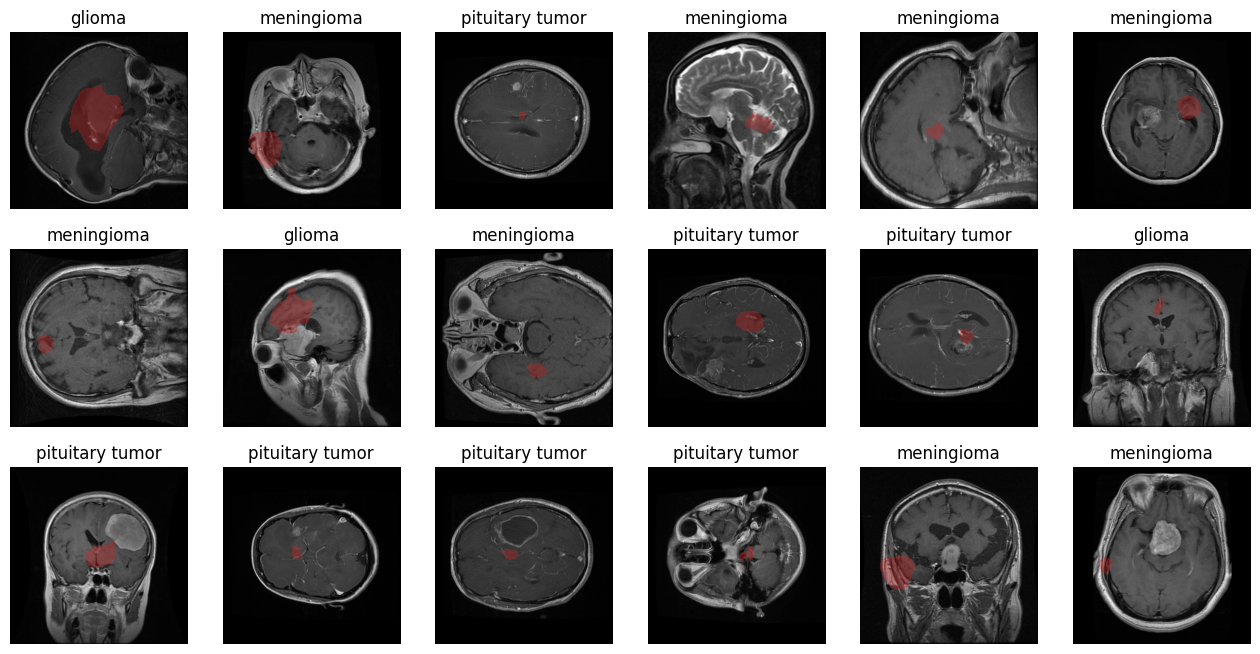

In [ ]:
plt.figure(figsize=(16, 8))
for i, idx in enumerate(np.random.randint(features_downsampled.shape[0], size=18), start=1):
    plt.subplot(3, 6, i)

    # Extract the 2D slice from the (1, 512, 512) array
    image_slice = features_downsampled[idx][0]
    plt.imshow(image_slice, cmap='gray')

    mask = np.ma.masked_where(tumor_mask[idx] == False, tumor_mask[idx])
    plt.imshow(mask, alpha=0.3, cmap='Set1')

    plt.title(integer_to_class[str(labels[idx])])
    plt.axis('off')

plt.show()


In [ ]:
import cv2
from skimage import segmentation
from skimage.color import label2rgb

plt.figure(figsize=(16, 8))
for i, idx in enumerate(np.random.randint(features_downsampled.shape[0], size=18), start=1):
    plt.subplot(3, 6, i)

    # Apply segmentation algorithm
    segmented = segmentation.clear_border(tumor_mask[idx])
    segmented = segmented.astype(features[idx][0].dtype)
    colored_segmentation = label2rgb(segmented, image=features_downsampled[idx][0], bg_label=0)

    plt.imshow(colored_segmentation)
    plt.title(integer_to_class[str(labels[idx])])
    plt.axis('off')

In [ ]:
# Calculate statistical measures of tumor areas
mean_area = np.mean(tumor_areas)
median_area = np.median(tumor_areas)
std_area = np.std(tumor_areas)
min_area = np.min(tumor_areas)
max_area = np.max(tumor_areas)

print(f"Mean Tumor Area: {mean_area} pixels")
print(f"Median Tumor Area: {median_area} pixels")
print(f"Standard Deviation of Tumor Area: {std_area} pixels")
print(f"Minimum Tumor Area: {min_area} pixels")
print(f"Maximum Tumor Area: {max_area} pixels")


Mean Tumor Area: 109792.56392405063 pixels
Median Tumor Area: 107829.0 pixels
Standard Deviation of Tumor Area: 24892.001930040788 pixels
Minimum Tumor Area: 15697 pixels
Maximum Tumor Area: 190141 pixels


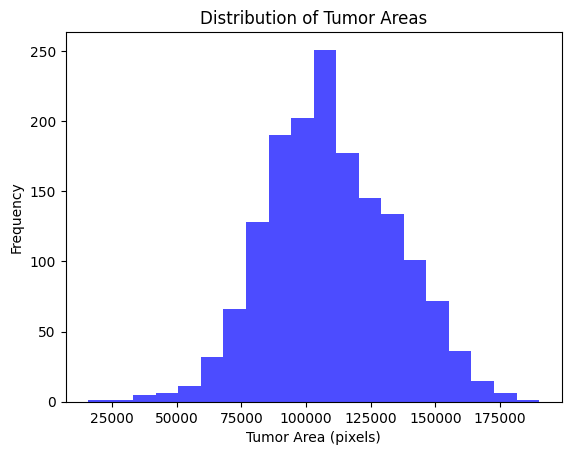

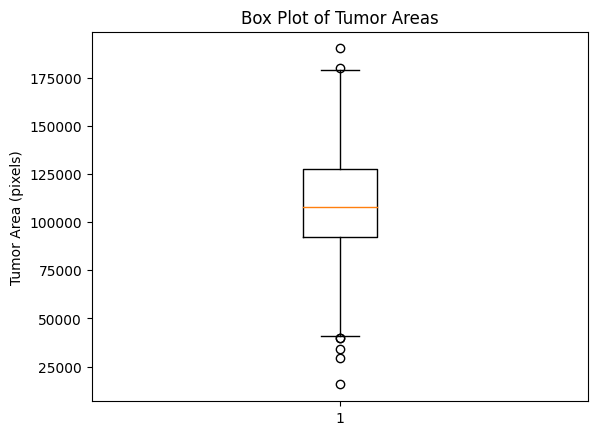

In [ ]:

plt.hist(tumor_areas, bins=20, color='blue', alpha=0.7)
plt.xlabel("Tumor Area (pixels)")
plt.ylabel("Frequency")
plt.title("Distribution of Tumor Areas")
plt.show()

plt.boxplot(tumor_areas)
plt.ylabel("Tumor Area (pixels)")
plt.title("Box Plot of Tumor Areas")
plt.show()


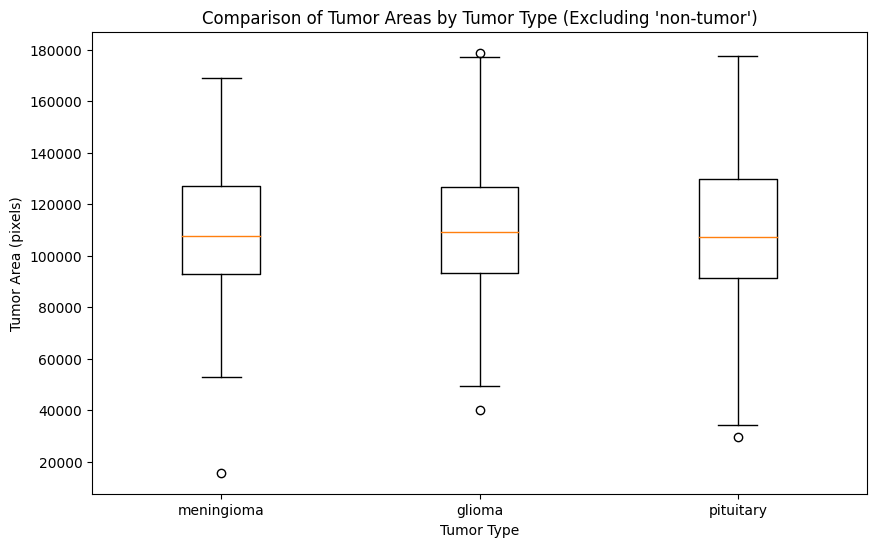

In [ ]:

tumor_areas_by_type = {}
for i, tumor_type in enumerate(tumor_types):
    if tumor_type != 'non-tumor':
        if tumor_type not in tumor_areas_by_type:
            tumor_areas_by_type[tumor_type] = []
        tumor_areas_by_type[tumor_type].append(tumor_areas[i])

# Create box plots to compare tumor areas by tumor type, excluding 'non-tumor'
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_areas_by_type.values(), labels=tumor_areas_by_type.keys())
plt.xlabel("Tumor Type")
plt.ylabel("Tumor Area (pixels)")
plt.title("Comparison of Tumor Areas by Tumor Type (Excluding 'non-tumor')")
plt.show()


In [ ]:
# Calculate the mean tumor area for each tumor class
mean_tumor_areas_by_type = {}
for tumor_type, areas in tumor_areas_by_type.items():
    mean_area = np.mean(areas)
    mean_tumor_areas_by_type[tumor_type] = mean_area

# Sort tumor classes based on mean tumor areas in descending order
sorted_tumor_classes = sorted(mean_tumor_areas_by_type.keys(), key=mean_tumor_areas_by_type.get, reverse=True)

highest_tumor_class = sorted_tumor_classes[0]
second_highest_tumor_class = sorted_tumor_classes[1]
third_highest_tumor_class = sorted_tumor_classes[2]
highest_average_area = mean_tumor_areas_by_type[highest_tumor_class]
second_highest_average_area = mean_tumor_areas_by_type[second_highest_tumor_class]
third_highest_average_area = mean_tumor_areas_by_type[third_highest_tumor_class]
print(f"Tumor Classes with the Highest Average Tumor Areas:")
print(f"1st: {highest_tumor_class}: {highest_average_area:.2f} pixels")
print(f"2nd: {second_highest_tumor_class}: {second_highest_average_area:.2f} pixels")
print(f"3rd: {third_highest_tumor_class}: {third_highest_average_area:.2f} pixels")


Tumor Classes with the Highest Average Tumor Areas:
1st: glioma: 110560.64 pixels
2nd: pituitary: 109654.67 pixels
3rd: meningioma: 109450.08 pixels


In [ ]:
import os
import numpy as np


folder_path = '/content/drive/MyDrive/Colab Notebooks/newdataset'

np.save(os.path.join('/content/drive/MyDrive/Colab Notebooks/newdataset', 'features_downsampled.npy'), features_downsampled)
np.save(os.path.join('/content/drive/MyDrive/Colab Notebooks/newdataset', 'labels_downsampled.npy'), labels_downsampled)
#np.save(os.path.join('/content/drive/MyDrive/Colab Notebooks/newdataset', 'tumor_border.npy'), tumor_border)
#np.save(os.path.join('/content/drive/MyDrive/Colab Notebooks/newdataset', 'tumor_mask.npy'), tumor_mask)